In [1]:
import scipy.io 

In [25]:
import h5py
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import gaussian_kde

In [3]:
# Specify the path to your text file
file_path = './cell_id.txt'

# Read data from the text file
with open(file_path, 'r') as file:
    data_string = file.read()

# Extract session indices and arrays from the string
sessions = {}
for line in data_string.strip().split('\n'):
    parts = line.split(':')
    session_index = int(parts[0].split('=')[1].strip())
    array_str = parts[1].replace('[', '').replace(']', '').replace(',', '').split()
    array = [int(val) for val in array_str]
    sessions[session_index] = np.array(array)
    
cell_types = sessions 
print(cell_types[1])

[1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 1
 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 2 2 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2]


In [4]:
# Check dataset 
with h5py.File('aggFC.mat', 'r') as file : 
    print(file.keys())
    print(file['sessions'])
    print(file['sesfcid'])
    print(file['sesfc'])
    print(file['sesfcPV'])

<KeysViewHDF5 ['#refs#', '#subsystem#', 'FSV1_fcagg', 'NunitsV1fc', 'OTV1_fcagg', 'RSV1_fcagg', 'conntypes', 'corrRdgc_fcagg', 'corrRdgr_fcagg', 'corrRdm_fcagg', 'corrRgb_fcagg', 'corrRttdgc_fcagg', 'corrRttdgr_fcagg', 'corrRttdm_fcagg', 'corrRttgb_fcagg', 'dgccontrasts', 'dgcoris', 'dgrcontrasts', 'dgroris', 'dmdirs', 'dmspeeds', 'gboris', 'gbxpos', 'gbypos', 'meanPSTHttdgc_fcagg', 'meanPSTHttdgr_fcagg', 'meanPSTHttdm_fcagg', 'meanPSTHttgb_fcagg', 'meanRttdgc_fcagg', 'meanRttdgr_fcagg', 'meanRttdm_fcagg', 'meanRttgb_fcagg', 'noisecorrRdgc_fcagg', 'noisecorrRdgr_fcagg', 'noisecorrRdm_fcagg', 'noisecorrRgb_fcagg', 'pairindconn_fcagg', 'pairings', 'postindconn_fcagg', 'preindconn_fcagg', 'psthtlidgc', 'psthtlidgr', 'psthtlidm', 'psthtligb', 'semRttdgc_fcagg', 'semRttdgr_fcagg', 'semRttdm_fcagg', 'semRttgb_fcagg', 'sesfc', 'sesfcPV', 'sesfcSST', 'sesfcVIP', 'sesfcid', 'sessions', 'sesunitsV1_fcagg', 'sigcorrRdgc_fcagg', 'sigcorrRdgr_fcagg', 'sigcorrRdm_fcagg', 'sigcorrRgb_fcagg', 'stdRttd

In [5]:
e_raw = []
p_raw = []
s_raw = []
v_raw = []

with h5py.File('aggFC.mat', 'r') as file:
    
    # Trial-averaged responses during visual presentation
    dataset = file['meanRttdgc_fcagg']
    dataset = dataset[0]
    
    # Loop through sessions(mice)
    for session_index, reference in enumerate(dataset):
        
        # Ignore 17-1, 18-1 th sessions
        if session_index in [16, 17]:
            continue
        
        response = file[reference]
        response = np.asarray(response)
        
        cell_type = cell_types[session_index]
        
        e_indices = np.where(cell_type == 1)[0]
        e_response = response[:, e_indices]
        e_raw.append(e_response)
        
        p_indices = np.where(cell_type == 2)[0]
        p_response = response[:, p_indices]
        p_raw.append(p_response)
        
        s_indices = np.where(cell_type == 3)[0]
        s_response = response[:, s_indices]
        s_raw.append(s_response)
        
        v_indices = np.where(cell_type == 4)[0]
        v_response = response[:, v_indices]
        v_raw.append(v_response)

        # Print information for each session in a single line
        print(f'Session {session_index + 1:2d}: Num total cells={response.shape[1]:3d}, Num e={e_response.shape[1]:3d}, Num p={p_response.shape[1]:3d}, Num s={s_response.shape[1]:3d}, Num v={v_response.shape[1]:3d}')

Session  1: Num total cells= 52, Num e= 41, Num p= 11, Num s=  0, Num v=  0
Session  2: Num total cells=101, Num e= 79, Num p= 21, Num s=  0, Num v=  0
Session  3: Num total cells= 72, Num e= 51, Num p= 21, Num s=  0, Num v=  0
Session  4: Num total cells= 85, Num e= 70, Num p= 14, Num s=  0, Num v=  0
Session  5: Num total cells= 54, Num e= 44, Num p= 10, Num s=  0, Num v=  0
Session  6: Num total cells= 69, Num e= 50, Num p= 16, Num s=  0, Num v=  0
Session  7: Num total cells= 85, Num e= 70, Num p= 14, Num s=  0, Num v=  0
Session  8: Num total cells= 75, Num e= 61, Num p= 14, Num s=  0, Num v=  0
Session  9: Num total cells=126, Num e=106, Num p= 20, Num s=  0, Num v=  0
Session 10: Num total cells= 83, Num e= 70, Num p= 13, Num s=  0, Num v=  0
Session 11: Num total cells= 82, Num e= 65, Num p= 16, Num s=  1, Num v=  0
Session 12: Num total cells= 68, Num e= 57, Num p= 11, Num s=  0, Num v=  0
Session 13: Num total cells= 14, Num e=  9, Num p=  2, Num s=  3, Num v=  0
Session 14: 

In [48]:
e_cat = np.concatenate(e_raw, axis=1)
p_cat = np.concatenate(p_raw, axis=1)
s_cat = np.concatenate(s_raw, axis=1)
v_cat = np.concatenate(v_raw, axis=1)

def reshape_cat_data (alpha_cat) :
    # Reshapes an array with shape (36,*) into (9,4*),
    # where * can be any positive integer.
    
    alpha_cat_reshape = np.array([alpha_cat[0:9].T, alpha_cat[9:18].T, alpha_cat[18:27].T, alpha_cat[27:].T]).T 
    alpha_cat_reshape = alpha_cat_reshape.reshape((9,-1))
    return alpha_cat_reshape

# Reshape concatenated arrays to ignore orientational information 
e_cat = reshape_cat_data(e_cat)
p_cat = reshape_cat_data(p_cat)
s_cat = reshape_cat_data(s_cat)
v_cat = reshape_cat_data(v_cat)

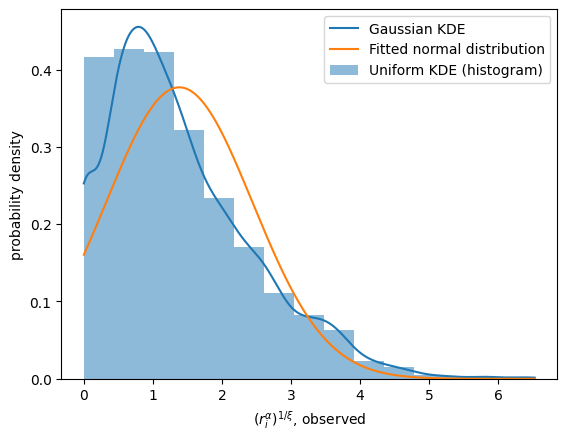

In [51]:
i = 0
rate  = e_cat[i,:]

sqrt_rate = np.sqrt(rate)

x_obs = sqrt_rate

# Define the number of bins for the histogram
num_bins = 15
# Calculate histogram
hist, bins = np.histogram(x_obs, bins=num_bins, density=True)
# Calculate bin width
bin_width = bins[1] - bins[0]
# Calculate KDE values
kde_values = hist / np.sum(hist) / bin_width
# Plot KDE
plt.bar(bins[:-1], kde_values, width=bin_width, alpha=0.5, align='edge', label='Uniform KDE(histogram)')

# Compute kernel density estimation
kde = gaussian_kde(x_obs)
# Evaluate KDE on a grid
x_grid = np.linspace(min(x_obs), max(x_obs), 1000)
kde_values = kde(x_grid)
plt.plot(x_grid, kde_values, label='Gaussian KDE')

mu = np.mean(sqrt_rate)
sig = np.std(sqrt_rate)
normal_values = np.exp(-0.5*((x_grid-mu)/sig)**2) / np.sqrt(2*np.pi) / sig
plt.plot(x_grid, normal_values, label='Fitted normal distribution')

plt.xlabel(r'$(r^\alpha_i)^{1/\xi}$, observed')
plt.ylabel(r'probability density')
plt.legend()

In [54]:
print(len(e_cat[i,:]))

5352


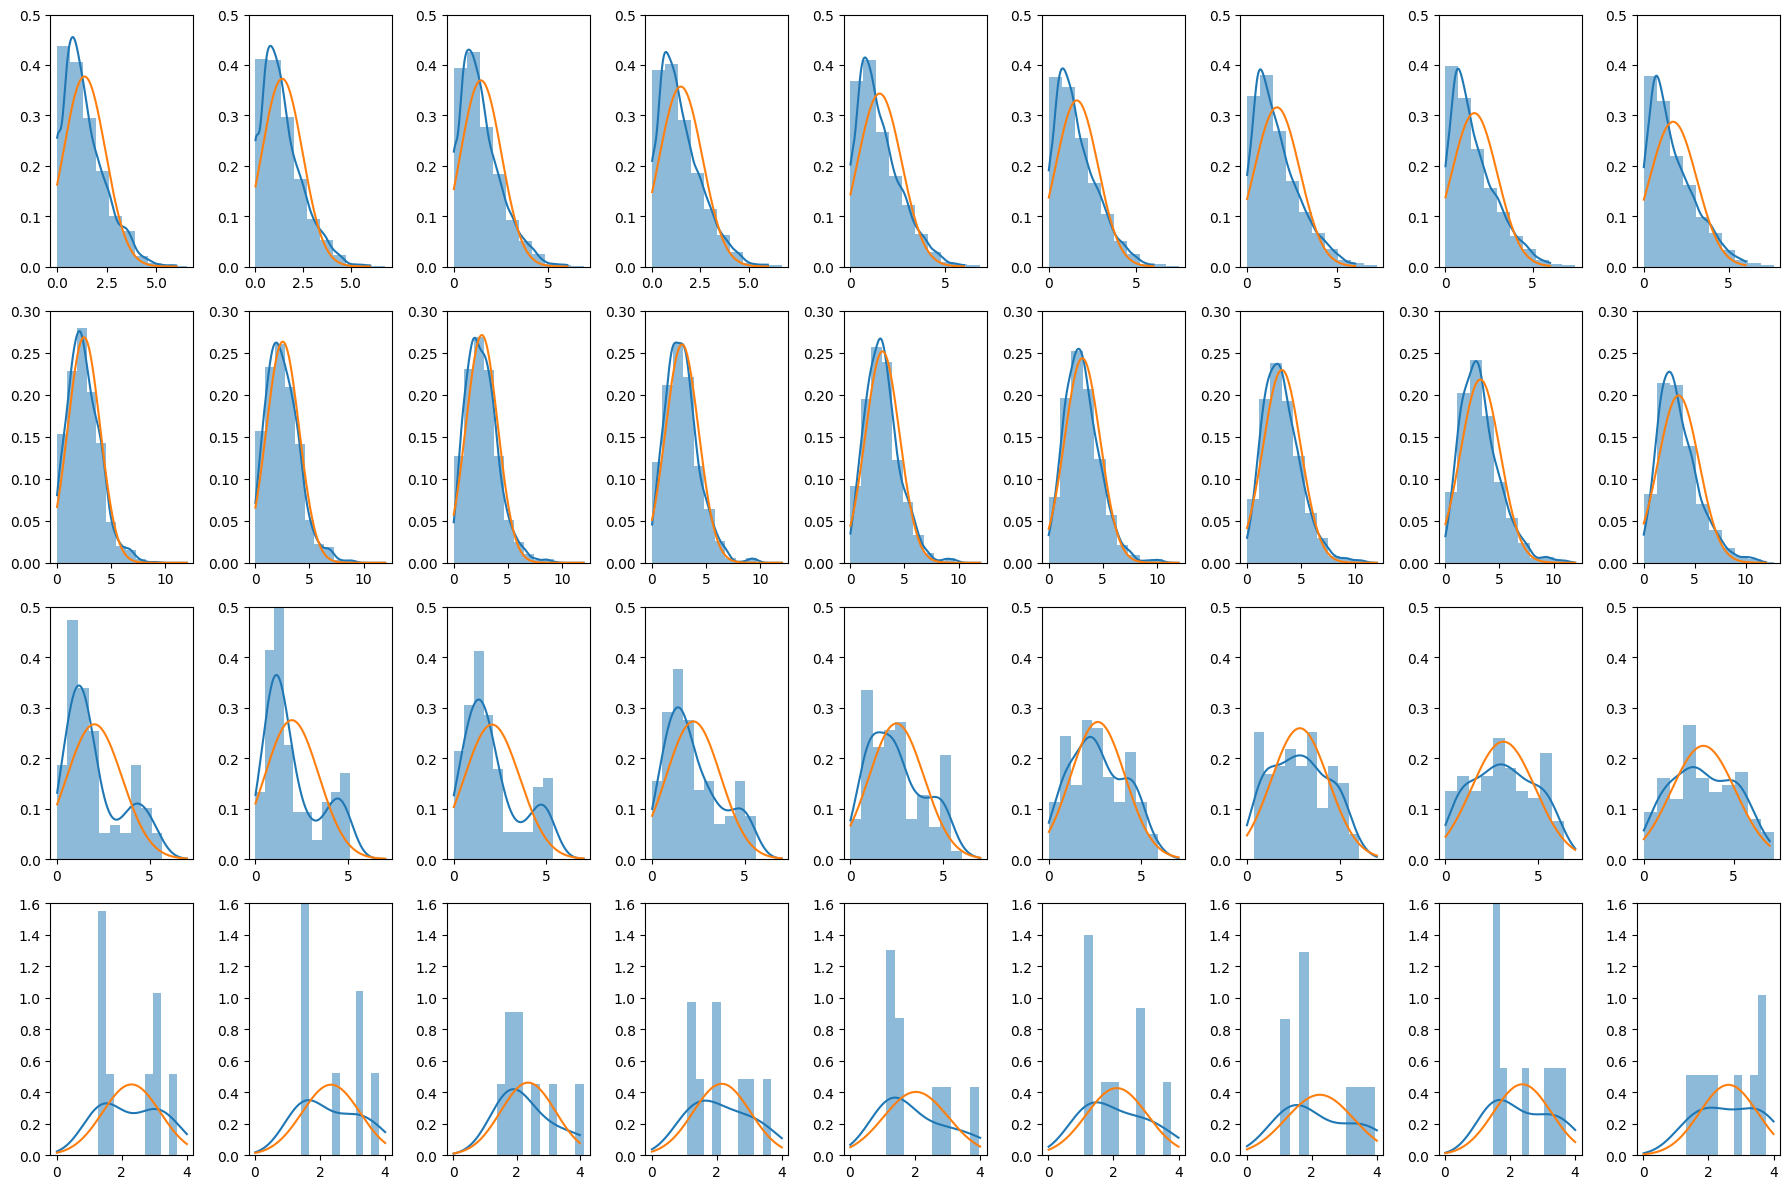

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming e_cat, p_cat, s_cat, and v_cat are 2D arrays with shape (9, n)
# where n is the number of data points in each category

categories = [e_cat, p_cat, s_cat, v_cat]
category_names = ['e_cat', 'p_cat', 's_cat', 'v_cat']

fig, axes = plt.subplots(4, 9, figsize=(18, 12))

x_lim = [6, 12, 7, 4]
y_lim = [0.5, 0.3, 0.5, 1.6]

for i in range(4):  # Iterate over categories
    for j in range(9):  # Iterate over indices
        ax = axes[i, j]
        
        rate = categories[i][j]
        sqrt_rate = np.sqrt(rate)
        
        # Define the number of bins for the histogram
        num_bins = 10
        
        # Calculate histogram
        hist, bins = np.histogram(sqrt_rate, bins=num_bins, density=True)
        
        # Calculate bin width
        bin_width = bins[1] - bins[0]
        
        # Calculate KDE values
        kde_values = hist / np.sum(hist) / bin_width
        
        # Plot KDE
        ax.bar(bins[:-1], kde_values, width=bin_width, alpha=0.5, align='edge', label='Uniform KDE(histogram)')
        
        # Compute kernel density estimation
        kde = gaussian_kde(sqrt_rate)
        
        # Evaluate KDE on a grid
        x_grid = np.linspace(0.01, x_lim[i], 1000)
        kde_values = kde(x_grid)
        
        ax.plot(x_grid, kde_values, label='Gaussian KDE')
        
        mu = np.mean(sqrt_rate)
        sig = np.std(sqrt_rate)
        normal_values = np.exp(-0.5*((x_grid-mu)/sig)**2) / np.sqrt(2*np.pi) / sig
        ax.plot(x_grid, normal_values, label='Fitted normal distribution')
        ax.set_ylim(0,y_lim[i])
        
        # ax.set_title(f'{category_names[i]}[{j}, :]')
        # ax.set_xlabel(r'$(r^\alpha_i)^{1/\xi}$, observed')
        # ax.set_ylabel(r'probability density')
        # ax.legend()

plt.tight_layout()
plt.show()


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.13333333333333333
0.0
0.0
1.6
2.0
1.8666666666666667
1.2
1.2
1.2
1.0666666666666667
2.1333333333333333
1.7333333333333334


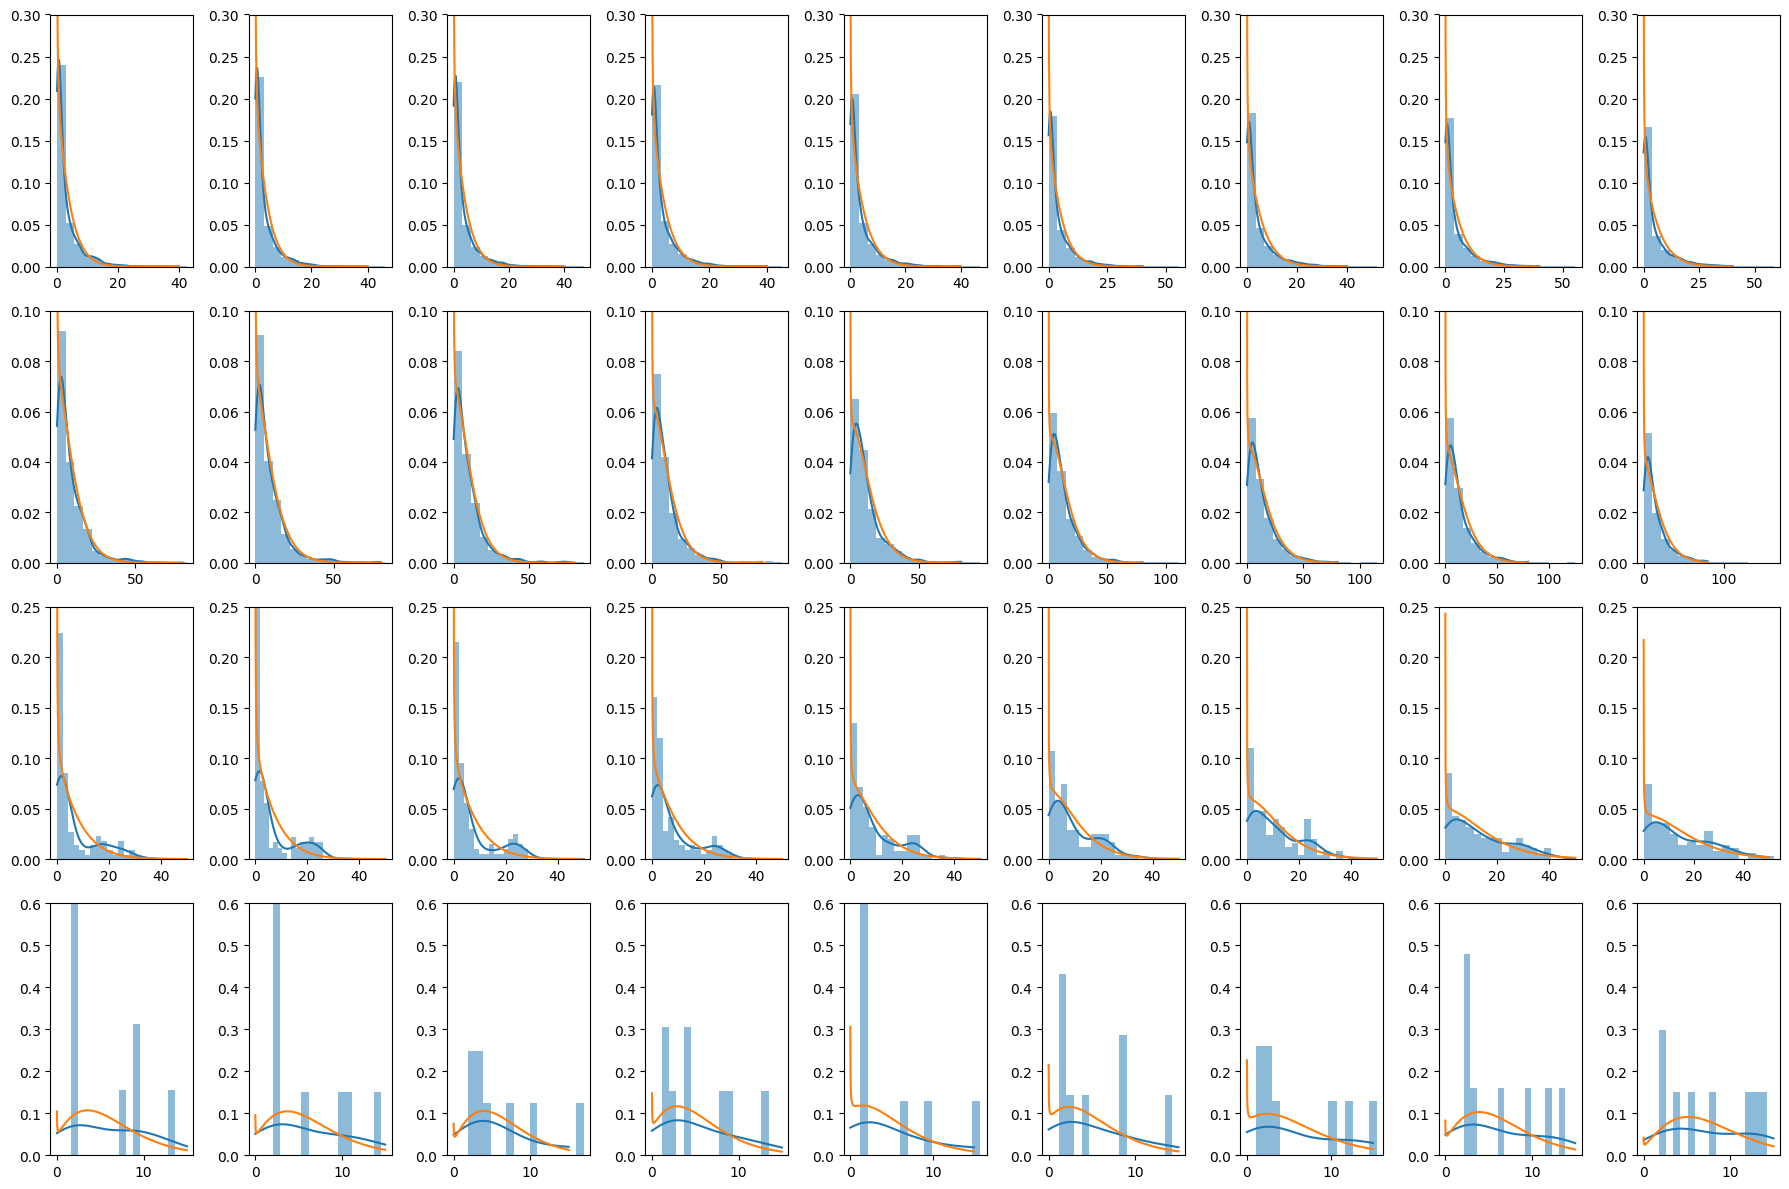

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming e_cat, p_cat, s_cat, and v_cat are 2D arrays with shape (9, n)
# where n is the number of data points in each category

categories = [e_cat, p_cat, s_cat, v_cat]
category_names = ['e_cat', 'p_cat', 's_cat', 'v_cat']
x_lim = [40, 80, 50, 15]
y_lim = [0.3, 0.1, 0.25, 0.6]

fig, axes = plt.subplots(4, 9, figsize=(18, 12))

for i in range(4):  # Iterate over categories
    for j in range(9):  # Iterate over indices
        ax = axes[i, j]
        
        rate = categories[i][j]
        sqrt_rate = np.sqrt(rate)
        
        # Define the number of bins for the histogram
        num_bins = 15
        
        # Calculate histogram
        hist, bins = np.histogram(rate, bins=num_bins, density=True)
        
        # Calculate bin width
        bin_width = bins[1] - bins[0]
        
        # Calculate KDE values
        kde_values = hist / np.sum(hist) / bin_width
        
        # Plot KDE
        ax.bar(bins[:-1], kde_values, width=bin_width, alpha=0.5, align='edge', label='Uniform KDE(histogram)')
        
        # Compute kernel density estimation
        kde = gaussian_kde(rate)
        
        # Evaluate KDE on a grid
        x_grid = np.linspace(0.01, x_lim[i], 1000)
        print(min(rate))
        kde_values = kde(x_grid)
        
        ax.plot(x_grid, kde_values, label='Gaussian KDE')
        
        mu = np.mean(sqrt_rate)
        sig = np.std(sqrt_rate)
        normal_values = np.exp(-0.5*((np.sqrt(x_grid)-mu)/sig)**2) / np.sqrt(2*np.pi) / sig
        pplus_values = normal_values / 2 / np.sqrt(x_grid)
        
        ax.plot(x_grid, pplus_values, label='Fitted normal distribution')
        ax.set_ylim(0, y_lim[i])
        
        # ax.set_title(f'{category_names[i]}[{j}, :]')
        # ax.set_xlabel(r'$(r^\alpha_i)^{1/\xi}$, observed')
        # ax.set_ylabel(r'probability density')
        # ax.legend()

plt.tight_layout()
plt.show()


In [16]:
print(v_cat[i,:]<)

[False False]


In [43]:
from scipy.optimize import curve_fit

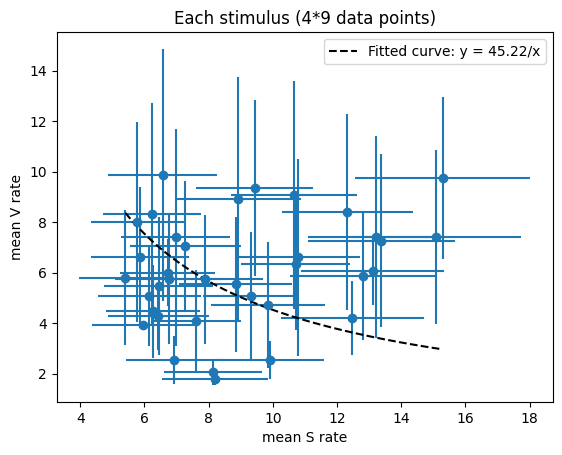

In [60]:
# Assuming e_cat, p_cat, s_cat, and v_cat are the concatenated arrays for 'e', 'p', 's', and 'v' cells
s_cat = np.concatenate(s_raw, axis=1)
v_cat = np.concatenate(v_raw, axis=1)

# Calculate mean and standard deviation along axis 1 (columns) for each neuronal type
s_mean = s_cat.mean(axis=1) 
s_std = s_cat.std(axis=1)/ np.sqrt(s_cat.shape[1])

v_mean = v_cat.mean(axis=1)
v_std = v_cat.std(axis=1)/ np.sqrt(v_cat.shape[1])

# Perform curve fitting
def func(x, a):
    return a / x
x_obs = s_mean 
y_obs = v_mean 
popt, pcov = curve_fit(func, x_obs, y_obs)

# Extract the fitted parameter
a_fit = popt[0]

# Generate y values using the fitted curve
xx = np.linspace(np.min(x_obs), np.max(x_obs), 100)
yy_fit = func(xx, a_fit)

plt.plot(xx, yy_fit, 'k--', label='Fitted curve: y = {:.2f}/x'.format(a_fit))
# plt.scatter(s_mean, v_mean)
plt.errorbar(s_mean, v_mean, xerr=s_std, yerr=v_std, fmt='o')

plt.title('Each stimulus (4*9 data points)')
plt.xlabel('mean S rate')
plt.ylabel('mean V rate')
plt.legend()

5.611330116634543

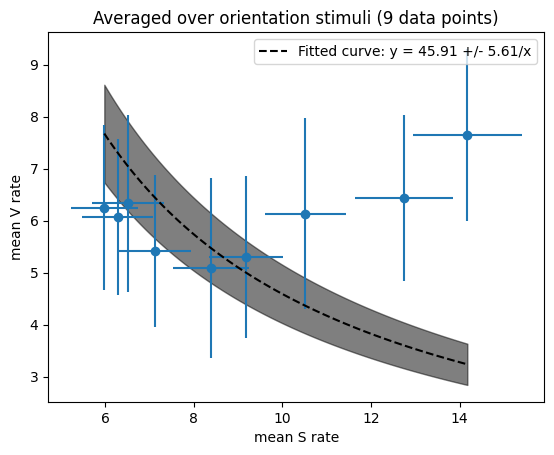

In [100]:
def reshape_cat_data (alpha_cat) :
    # Reshapes an array with shape (36,*) into (9,4*),
    # where * can be any positive integer.
    
    alpha_cat_reshape = np.array([alpha_cat[0:9].T, alpha_cat[9:18].T, alpha_cat[18:27].T, alpha_cat[27:].T]).T 
    alpha_cat_reshape = alpha_cat_reshape.reshape((9,-1))
    return alpha_cat_reshape

# Assuming e_cat, p_cat, s_cat, and v_cat are the concatenated arrays for 'e', 'p', 's', and 'v' cells
s_cat = np.concatenate(s_raw, axis=1)
v_cat = np.concatenate(v_raw, axis=1)

# Reshape s_cat and v_cat
s_cat = reshape_cat_data(s_cat)
v_cat = reshape_cat_data(v_cat)

# Calculate mean and standard deviation along axis 1 (columns) for each neuronal type
s_mean = s_cat.mean(axis=1) 
s_std = s_cat.std(axis=1)/ np.sqrt(s_cat.shape[1])

v_mean = v_cat.mean(axis=1)
v_std = v_cat.std(axis=1)/ np.sqrt(v_cat.shape[1])

# Perform curve fitting
def func(x, a):
    return a / x
x_obs = s_mean 
y_obs = v_mean 
popt, pcov = curve_fit(func, x_obs, y_obs)

# Extract the fitted parameter
a_fit = popt[0]
a_fit_uncertainty = np.sqrt(pcov[0, 0])

# Generate y values using the fitted curve
xx = np.linspace(np.min(x_obs), np.max(x_obs), 100)
yy_fit = func(xx, a_fit)

plt.plot(xx, yy_fit, 'k--', label=f'Fitted curve: y = {a_fit:.2f} +/- {a_fit_uncertainty:.2f}/x')
yy_fit = func(xx, a_fit+a_fit_uncertainty)
plt.fill_between(xx, func(xx, a_fit - a_fit_uncertainty), func(xx, a_fit + a_fit_uncertainty), color='k', alpha=0.5)
# plt.scatter(s_mean, v_mean)
plt.errorbar(s_mean, v_mean, xerr=s_std, yerr=v_std, fmt='o')

plt.title('Averaged over orientation stimuli (9 data points)')
plt.xlabel('mean S rate')
plt.ylabel('mean V rate')
plt.legend()
a_fit_uncertainty

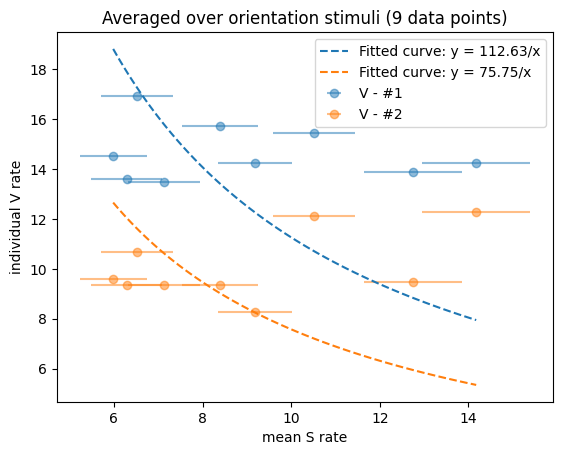

In [84]:
def reshape_cat_data (alpha_cat) :
    # Reshapes an array with shape (36,*) into (9,4*),
    # where * can be any positive integer.
    
    alpha_cat_reshape = np.array([alpha_cat[0:9].T, alpha_cat[9:18].T, alpha_cat[18:27].T, alpha_cat[27:].T]).T 
    alpha_cat_reshape = alpha_cat_reshape.reshape((9,-1))
    return alpha_cat_reshape

# Assuming e_cat, p_cat, s_cat, and v_cat are the concatenated arrays for 'e', 'p', 's', and 'v' cells
s_cat = np.concatenate(s_raw, axis=1)
v_cat = np.concatenate(v_raw, axis=1)

# Reshape s_cat and v_cat
s_cat = reshape_cat_data(s_cat)
v_cat = reshape_cat_data(v_cat)

# Calculate mean and standard deviation along axis 1 (columns) for each neuronal type
s_mean = s_cat.mean(axis=1) 
s_std = s_cat.std(axis=1)/ np.sqrt(s_cat.shape[1])

for i in [0,1] : 
    v_mean = v_cat[:,i]
    plt.errorbar(s_mean, v_mean, xerr=s_std, fmt='o', label=f'V - #{i+1}', alpha=0.5)

    # Perform curve fitting
    def func(x, a):
        return a / x
    x_obs = s_mean 
    y_obs = v_mean 
    popt, pcov = curve_fit(func, x_obs, y_obs)

    # Extract the fitted parameter
    a_fit = popt[0]

    # Generate y values using the fitted curve
    xx = np.linspace(np.min(x_obs), np.max(x_obs), 100)
    yy_fit = func(xx, a_fit)
    plt.plot(xx, yy_fit, f'C{i}--', label='Fitted curve: y = {:.2f}/x'.format(a_fit))

plt.title('Averaged over orientation stimuli (9 data points)')
plt.xlabel('mean S rate')
plt.ylabel('individual V rate')
plt.legend()

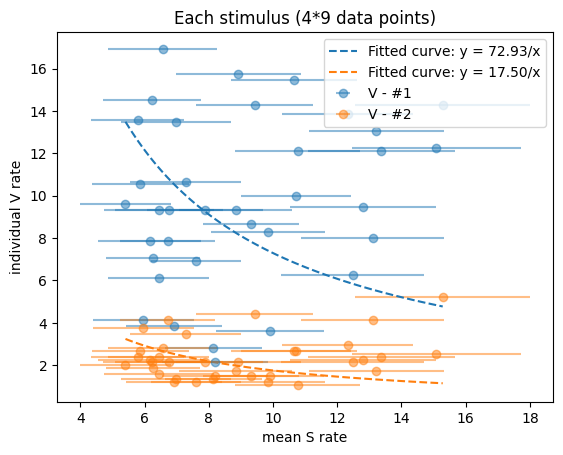

In [87]:
# Assuming e_cat, p_cat, s_cat, and v_cat are the concatenated arrays for 'e', 'p', 's', and 'v' cells
s_cat = np.concatenate(s_raw, axis=1)
v_cat = np.concatenate(v_raw, axis=1)

# Calculate mean and standard deviation along axis 1 (columns) for each neuronal type
s_mean = s_cat.mean(axis=1) 
s_std = s_cat.std(axis=1)/ np.sqrt(s_cat.shape[1])

for i in [0,1] : 
    v_mean = v_cat[:,i]
    plt.errorbar(s_mean, v_mean, xerr=s_std, fmt='o', label=f'V - #{i+1}', alpha=0.5)

    # Perform curve fitting
    def func(x, a):
        return a / x
    x_obs = s_mean 
    y_obs = v_mean 
    popt, pcov = curve_fit(func, x_obs, y_obs)

    # Extract the fitted parameter
    a_fit = popt[0]

    # Generate y values using the fitted curve
    xx = np.linspace(np.min(x_obs), np.max(x_obs), 100)
    yy_fit = func(xx, a_fit)
    plt.plot(xx, yy_fit, f'C{i}--', label='Fitted curve: y = {:.2f}/x'.format(a_fit))

plt.title('Each stimulus (4*9 data points)')
plt.xlabel('mean S rate')
plt.ylabel('individual V rate')
plt.legend()

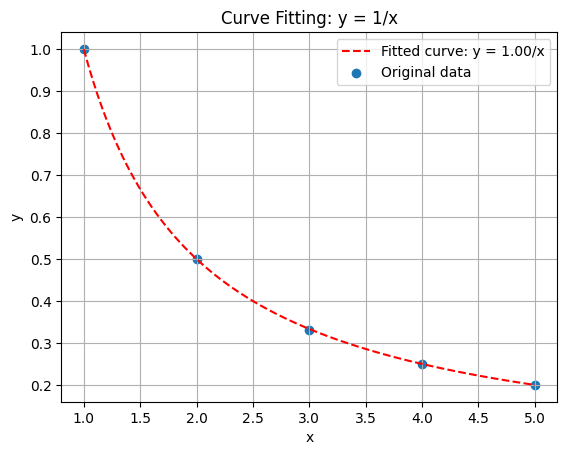

Fitted parameter (a): 0.9992408426672963


In [30]:
from scipy.optimize import curve_fit

# Define the function y = 1/x
def func(x, a):
    return a / x

# Example data (replace with your actual data)
x_obs = np.array([1, 2, 3, 4, 5])
y_obs = np.array([1, 0.5, 0.33, 0.25, 0.2])

# Perform curve fitting
popt, pcov = curve_fit(func, x_obs, y_obs)

# Extract the fitted parameter
a_fit = popt[0]

# Generate y values using the fitted curve
xx = np.linspace(np.min(x_obs), np.max(x_obs), 100)
y_fit = func(xx, a_fit)

# Plotting
plt.scatter(x_obs, y_obs, label='Original data')
plt.plot(xx, y_fit, 'r--', label='Fitted curve: y = {:.2f}/x'.format(a_fit))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Curve Fitting: y = 1/x')
plt.grid(True)
plt.show()

print("Fitted parameter (a):", a_fit)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


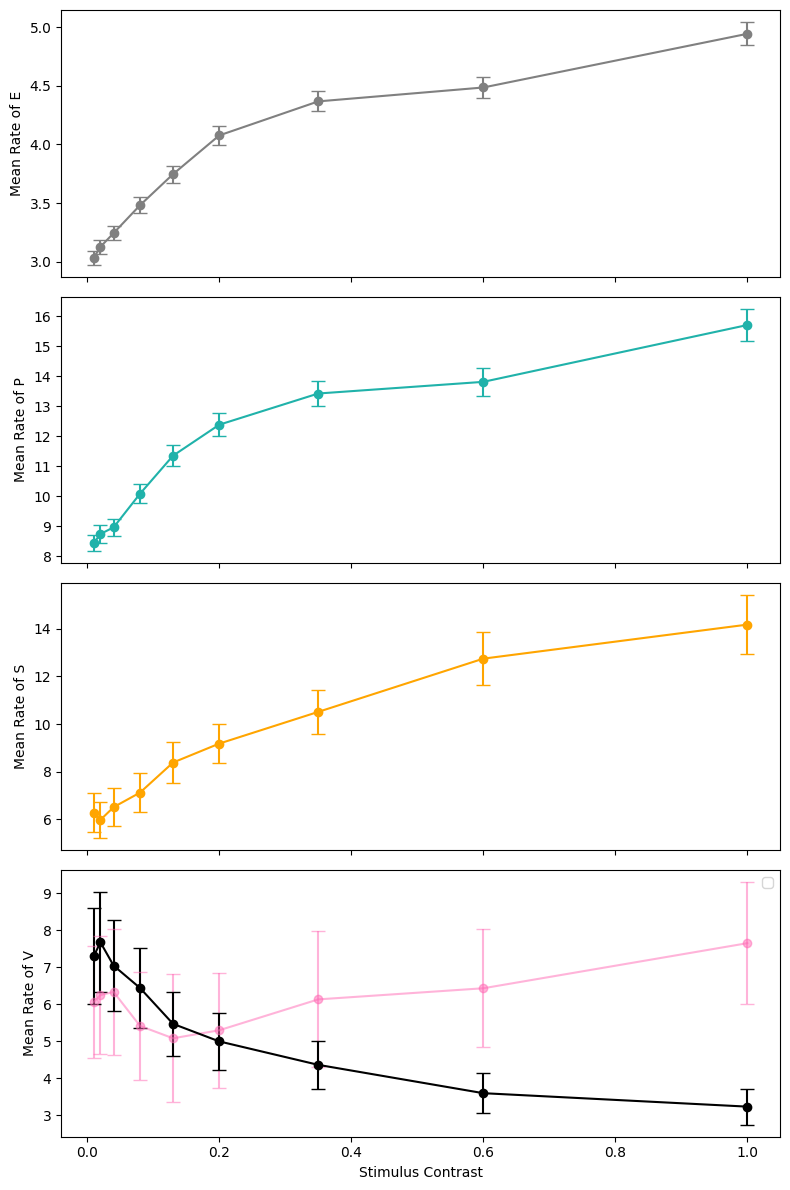

In [226]:
import matplotlib.pyplot as plt

# Contrast data 
c = np.asarray([.01, .02, .04, .08, .13, .2, .35, .6, 1])

# Assuming e_cat, p_cat, s_cat, and v_cat are the concatenated arrays for 'e', 'p', 's', and 'v' cells
e_cat = np.concatenate(e_raw, axis=1)
p_cat = np.concatenate(p_raw, axis=1)
s_cat = np.concatenate(s_raw, axis=1)
v_cat = np.concatenate(v_raw, axis=1)

# Reshape concatenated arrays to ignore orientational information 
e_cat = reshape_cat_data(e_cat)
p_cat = reshape_cat_data(p_cat)
s_cat = reshape_cat_data(s_cat)
v_cat = reshape_cat_data(v_cat)

# Proportion of each neuronal type 
N = np.asarray([e_cat.shape[-1], p_cat.shape[-1], s_cat.shape[-1], v_cat.shape[-1]])


# Calculate mean and standard deviation along axis 1 (columns) for each neuronal type
e_mean = e_cat.mean(axis=1)
e_std = e_cat.std(axis=1) / np.sqrt(e_cat.shape[1])

p_mean = p_cat.mean(axis=1)
p_std = p_cat.std(axis=1)/ np.sqrt(p_cat.shape[1])

s_mean = s_cat.mean(axis=1)
s_std = s_cat.std(axis=1)/ np.sqrt(s_cat.shape[1])

v_mean = v_cat.mean(axis=1)
v_std = v_cat.std(axis=1)/ np.sqrt(v_cat.shape[1])


# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 12), sharex=True)

# Plot 'e' cells
axs[0].errorbar(c, e_mean, yerr=e_std, label='e cells', color='gray', fmt= '-o', capsize=5)
axs[0].set_ylabel(r'Mean Rate of E')

# Plot 'p' cells
axs[1].errorbar(c, p_mean, yerr=p_std, label='p cells', color='lightseagreen', fmt= '-o', capsize=5)
axs[1].set_ylabel(r'Mean Rate of P')

# Plot 's' cells
axs[2].errorbar(c, s_mean, yerr=s_std, label='s cells', color='orange', fmt= '-o', capsize=5)
axs[2].set_ylabel(r'Mean Rate of S')
plt.legend()

# Plot 'v' cells
axs[3].errorbar(c, v_mean, yerr=v_std, color='hotpink', fmt= '-o', capsize=5, alpha=0.5)
# for i in range(8) : 
#     axs[3].plot(c, v_cat[:,i],  color='hotpink', linestyle='-', marker=None, alpha=0.5)

axs[3].set_ylabel(r'Mean Rate of V')

a_fit = 45.91
a_fit_uncertainty - 5.61
y_err_1 = s_std*a_fit/(s_mean**2)
y_err_2 = a_fit_uncertainty / s_mean 
y_err_tot = np.sqrt(y_err_1**2 + y_err_2**2)

v_mean_fit = a_fit / s_mean 
v_std_fit = y_err_tot

axs[3].errorbar(c, v_mean_fit, yerr=v_std_fit, color='black', fmt= '-o', capsize=5)
axs[3].set_ylabel(r'Mean Rate of V')

# Customize the plot as needed
axs[3].set_xlabel('Stimulus Contrast')
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

# First-Order Mean Field

In [227]:
q_mossing = [0.8, 0.08, 0.06, 0.06]

In [228]:
e, p, s, v = q_mossing[0]*e_mean, q_mossing[1]*p_mean, q_mossing[2]*s_mean, q_mossing[3]*v_mean_fit

e_std, p_std, s_std, v_std = q_mossing[0]*e_std, q_mossing[1]*p_std, q_mossing[2]*s_std, q_mossing[3]*v_std_fit

# e, p, s, v = e_mean, p_mean, s_mean, v_mean_fit

# e_std, p_std, s_std, v_std = e_std, p_std, s_std, v_std_fit

In [229]:
# Contrast arrays 
c = np.asarray([.01, .02, .04, .08, .13, .2, .35, .6, 1])
# indices = [0,3,5,6,7,8]
# c = c[indices]
# c = np.asarray([.01, .08, .2, .35, .6, 1])
# c = np.asarray([.01, .02, .04, .08, .13, .2, .35, .6])
# e, p, s, v = e[0,3,5,6,7,8], p[(0,3,5,6,7,8)], s[(0,3,5,6,7,8)], v[(0,3,5,6,7,8)]
# e_std, p_std, s_std, v_std = e_std[:8], p_std[:8], s_std[:8], v_std[:8]
# e, p, s, v = e[indices], p[indices], s[indices], v[indices]
# e_std, p_std, s_std, v_std = e_std[indices], p_std[indices], s_std[indices], v_std[indices]

# Matrix for NNLS fit
# A = np.asarray([e, -p, -s, -v, np.ones(len(c)), c, c**2, c**3]).T
A = np.asarray([e, -p, -s, -v, np.ones(len(c)), c]).T
A

array([[ 2.42628799, -0.67445333, -0.37707692, -0.43830845,  1.        ,
         0.01      ],
       [ 2.50054808, -0.69884444, -0.359     , -0.46037883,  1.        ,
         0.02      ],
       [ 2.59453911, -0.71661333, -0.39107692, -0.42261762,  1.        ,
         0.04      ],
       [ 2.78491281, -0.80631111, -0.42769231, -0.38643669,  1.        ,
         0.08      ],
       [ 2.99713004, -0.90783111, -0.50330769, -0.32837964,  1.        ,
         0.13      ],
       [ 3.26176383, -0.99053333, -0.551     , -0.29995644,  1.        ,
         0.2       ],
       [ 3.49428999, -1.07383111, -0.63084615, -0.26199098,  1.        ,
         0.35      ],
       [ 3.58917788, -1.10494222, -0.76476923, -0.21611225,  1.        ,
         0.6       ],
       [ 3.95593423, -1.25663111, -0.85046154, -0.19433683,  1.        ,
         1.        ]])

In [230]:
def get_stable_solutions (c_idx, w, visualize=False) : 
    # Input : Contrast Index, Weight
    # c_idx : index of the contrast
    # w : parameter from NNLS
    
    # Output : Rate Evolved 
    
    # Parameters for rate evolution
    m = 500 # Total steps for evolution
    tau = 10 # (ms). Time constant of the rate model 
    Delta_t = 1 # (ms). Time interval for numerical integration 
    traj = [] # Rate trajectory stored every step. 
    eps = Delta_t / tau # = 0.2 

    # Transfer function of the rate model 
    def f(x):
        relu_result = np.maximum(0, x)
        square_result = relu_result ** 2
        return square_result

    # 1. Set initial configuration as data points
    r = np.asarray([e[c_idx], p[c_idx], s[c_idx], v[c_idx]])

    # 2. Integrate dynamicss
    for t in range(m) : 
        traj.append(r)
        # print(w.shape) # (4,6)
        # print(np.asarray([r[0], -r[1], -r[2], -r[3], 1, c[c_idx]]).shape) # (6,)
        r = r + eps * ( - r + f (np.dot (w,  np.asarray([r[0], -r[1], -r[2], -r[3], 1, c[c_idx]]) ) ) )
    traj = np.asarray(traj)
    
    # 3. Check Convergence 
    if visualize == True : 
        for i in range(4) : 
            plt.plot(traj[:,i])
        plt.show()
    
    return traj[-1,:]

In [239]:
import math
from scipy.optimize import nnls 

# Output 
w_list = [] 
r_conv_list = [] 
llh_list = [] 

n_sample = 500

sampling_factor = 2

from tqdm import tqdm 
for k in tqdm(range(n_sample)) : 
    
    # 1. Sample Pseudo Data 
    re_sam = e + np.random.normal(0, sampling_factor *e_std)
    rp_sam = p + np.random.normal(0, sampling_factor *p_std)
    rs_sam = s + np.random.normal(0, sampling_factor *s_std)
    rv_sam = v + np.random.normal(0, sampling_factor *v_std)
    
    # 2. Fit NNLS Weight to the Sampled Data
    A = np.asarray([re_sam, -rp_sam, -rs_sam, -rv_sam, np.ones(len(c)), c]).T
    ye = np.sqrt(e); xe, ee = nnls(A,ye)
    yp = np.sqrt(p); xp, ep = nnls(A,yp)
    ys = np.sqrt(s); xs, es = nnls(A,ys)
    yv = np.sqrt(v); xv, ev = nnls(A,yv)
    w = np.asarray([xe, xp, xs, xv])
    
    # 3. Get Stable Solutions for NNLS Weight
    conv_r = [] 
    for c_idx in range(len(c)) : 
        conv_r.append( get_stable_solutions(c_idx,w,visualize=False) )
    conv_r = np.asarray(conv_r)
    re_conv = conv_r[:,0]
    rp_conv = conv_r[:,1]
    rs_conv = conv_r[:,2]
    rv_conv = conv_r[:,3]
    
    # plt.plot(c, conv_r[:,0], marker='o')
    
    # 4. Calculate Log-likelihood of The Solution & Data    
    llh = -0.5 * ( (re_conv - e)/(e_std) )**2 -0.5* np.log(2 * np.pi * e_std**2)
    llh += -0.5 * ( (rp_conv - p)/(p_std) )**2 -0.5* np.log(2 * np.pi * p_std**2)
    llh += -0.5 * ( (rs_conv - s)/(s_std) )**2 -0.5* np.log(2 * np.pi * s_std**2)
    llh += -0.5 * ( (rv_conv - v)/(v_std) )**2 -0.5* np.log(2 * np.pi * v_std**2)
    llh = llh.sum() 
    
    if not math.isnan(llh) :
        w_list.append(w)
        r_conv_list.append(conv_r)
        llh_list.append(llh)

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 1/500 [00:00<02:52,  2.89it/s]C:\Users\lamad\AppData\Local\Temp\ipykernel_15024\3830099821.py:18: RuntimeWarning: overflow encountered in square
  square_result = relu_result ** 2
 38%|███▊      | 189/500 [00:19<01:27,  3.54it/s]C:\Users\lamad\AppData\Local\Temp\ipykernel_15024\3514980661.py:43: RuntimeWarning: overflow encountered in square
  llh = -0.5 * ( (re_conv - e)/(e_std) )**2 -0.5* np.log(2 * np.pi * e_std**2)
C:\Users\lamad\AppData\Local\Temp\ipykernel_15024\3514980661.py:44: RuntimeWarning: overflow encountered in square
  llh += -0.5 * ( (rp_conv - p)/(p_std) )**2 -0.5* np.log(2 * np.pi * p_std**2)
100%|██████████| 500/500 [00:45<00:00, 10.91it/s]


327


Text(0.5, 0, 'Model Indices')

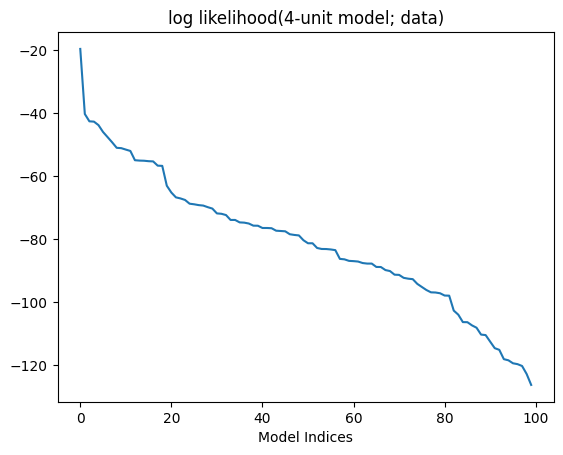

In [240]:
# 5. Select Top Models 
w_list = np.asarray(w_list)
r_conv_list = np.asarray(r_conv_list)
llh_list = np.asarray(llh_list)
    
sorted_indices = sorted(range(len(llh_list)), key=lambda k: -llh_list[k])
print(len(llh_list))
plt.plot(llh_list[sorted_indices][:100]); plt.title(r'log likelihood(4-unit model; data)'); plt.xlabel('Model Indices')

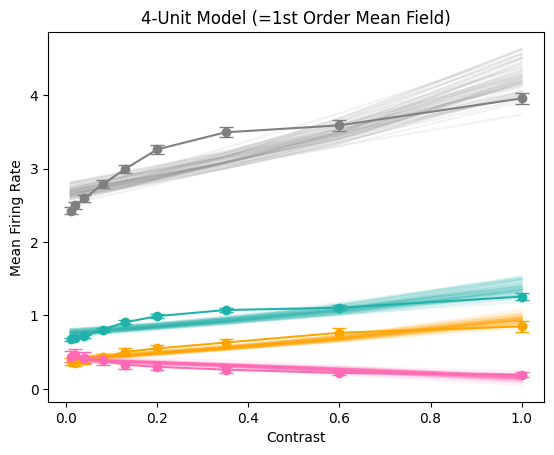

In [241]:
top_n = 50

for k in sorted_indices[:top_n] : 
    plt.plot(c, r_conv_list[k][:,0], color='gray',alpha=0.1)
    plt.plot(c, r_conv_list[k][:,1], color='lightseagreen',alpha=0.1)
    plt.plot(c, r_conv_list[k][:,2], color='orange',alpha=0.1)
    plt.plot(c, r_conv_list[k][:,3], color='hotpink',alpha=0.1)
    
plt.errorbar(x=c,y=e,yerr=e_std,color='gray',fmt= '-o', capsize=5)
plt.errorbar(x=c,y=p,yerr=p_std,color='lightseagreen',fmt= '-o', capsize=5)
plt.errorbar(x=c,y=s,yerr=s_std,color='orange',fmt= '-o', capsize=5)
plt.errorbar(x=c,y=v,yerr=v_std,color='hotpink',fmt= '-o', capsize=5)

plt.title('4-Unit Model (=1st Order Mean Field)')
plt.ylabel('Mean Firing Rate'); plt.xlabel('Contrast')
# plt.ylim(0,1)
plt.show()

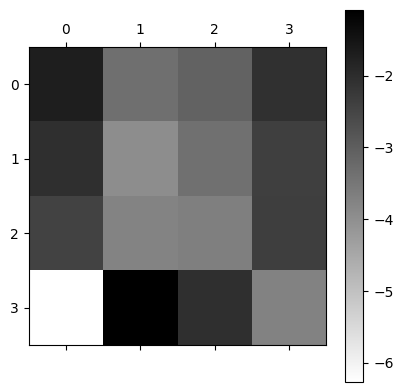

In [242]:
w_LD = w_list[sorted_indices[:top_n]].mean(axis=0)[:,:4]
plt.matshow(np.log(w_LD), cmap='gray_r')
plt.colorbar(); plt.show()

C:\Users\lamad\AppData\Local\Temp\ipykernel_15024\1839433887.py:14: RuntimeWarning: divide by zero encountered in log
  plt.matshow(np.log(w_re), cmap='gray_r')


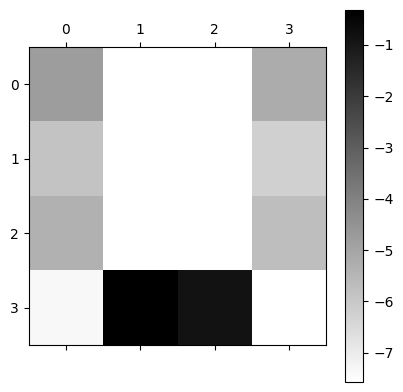

In [209]:
N_mossing = [2664, 57, 203, 169]
N_mossing = np.asarray(N_mossing)
q = N_mossing / np.sum(N_mossing)

# Calculate the square root of q
sqrt_q = np.sqrt(q)

# Create a broadcastable version of sqrt_q for multiplication
sqrt_q_broadcasted = sqrt_q[:, np.newaxis]

# Calculate the modified array v
w_re = w_LD * sqrt_q_broadcasted / q

plt.matshow(np.log(w_re), cmap='gray_r')
plt.colorbar(); plt.show()

In [ ]:
c = np.linspace(0,1,100)
h0 = w_LD[0,4]
h0 = w_LD[0,4]

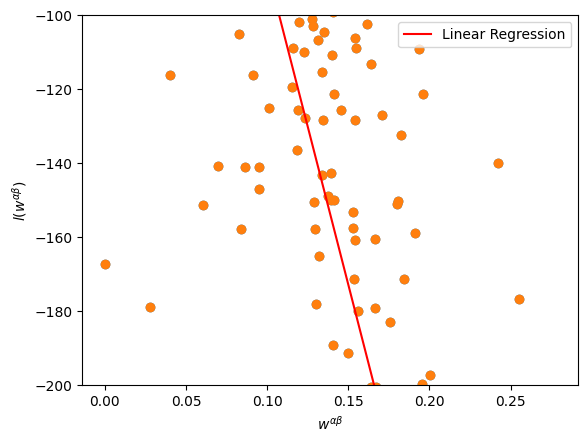

In [133]:
w_ee_list = w_list[:, 0, 0]
sorted_indices = np.argsort(w_ee_list)

sorted_w_ee_list = w_ee_list[sorted_indices]
sorted_llh_list = llh_list[sorted_indices]

plt.scatter(sorted_w_ee_list, sorted_llh_list)

# Calculate linear regression
slope, intercept = np.polyfit(sorted_w_ee_list, sorted_llh_list, 1)
linear_regression = slope * sorted_w_ee_list + intercept

# Plot scatter plot
plt.scatter(sorted_w_ee_list, sorted_llh_list)

# Plot linear regression curve
plt.plot(sorted_w_ee_list, linear_regression, color='red', label='Linear Regression')

# Set y-axis limit
plt.ylim(-200, -100)

# Add labels and legend
plt.xlabel(r'$w^{\alpha\beta}$')
plt.ylabel(r'$l(w^{\alpha \beta})$')
plt.legend()

# Show plot
plt.show()

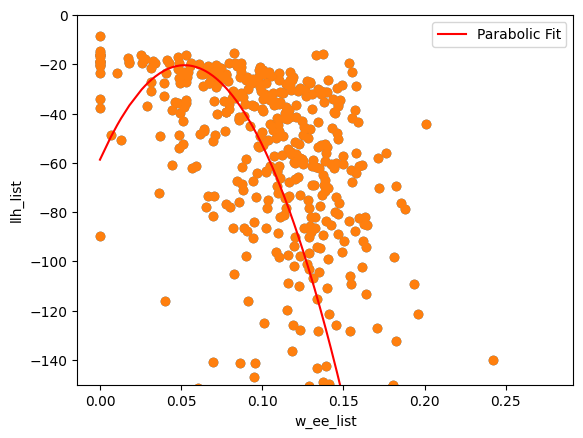

In [135]:
from scipy.optimize import curve_fit

w_ee_list = w_list[:, 0, 0]
sorted_indices = np.argsort(w_ee_list)

sorted_w_ee_list = w_ee_list[sorted_indices]
sorted_llh_list = llh_list[sorted_indices]

plt.scatter(sorted_w_ee_list, sorted_llh_list)

# Fit a quadratic function (parabola) to the data
coefficients = np.polyfit(sorted_w_ee_list, sorted_llh_list, 2)

# Generate the parabolic curve using the coefficients
parabolic_curve = np.polyval(coefficients, sorted_w_ee_list)

# Plot scatter plot
plt.scatter(sorted_w_ee_list, sorted_llh_list)

# Plot parabolic curve
plt.plot(sorted_w_ee_list, parabolic_curve, color='red', label='Parabolic Fit')

# Set y-axis limit
plt.ylim(-150, 0)

# Add labels and legend
plt.xlabel('w_ee_list')
plt.ylabel('llh_list')
plt.legend()

# Show plot
plt.show()

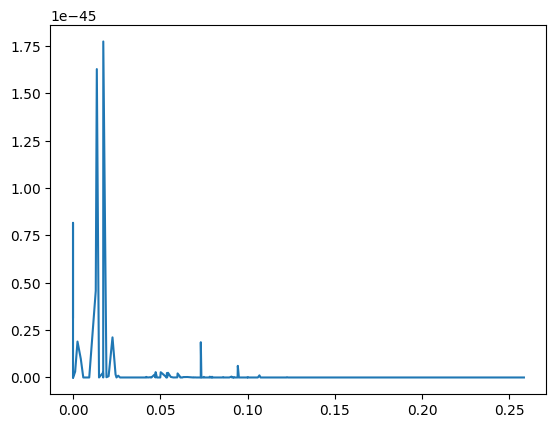

In [167]:
w_ee_list = w_list[:, 0, 0]
sorted_indices = np.argsort(w_ee_list)

sorted_w_ee_list = w_ee_list[sorted_indices]
sorted_llh_list = llh_list[sorted_indices]

plt.plot(sorted_w_ee_list, np.exp(sorted_llh_list))
plt.show()

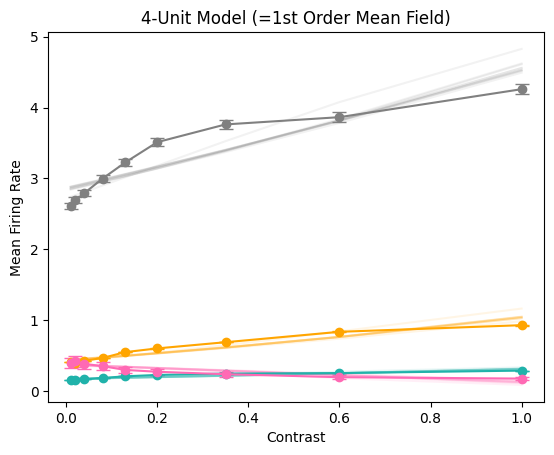

C:\Users\lamad\AppData\Local\Temp\ipykernel_15024\2276941147.py:2: RuntimeWarning: divide by zero encountered in log
  plt.matshow(np.log(w_LD), cmap='gray_r')


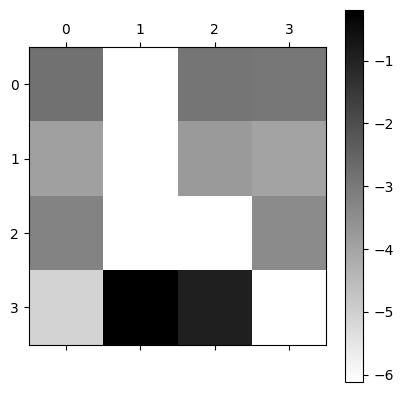

In [147]:
w_LD = w_list[sorted_indices[:top_n]].mean(axis=0)[:,:4]
plt.matshow(np.log(w_LD), cmap='gray_r')
plt.colorbar(); plt.show()

C:\Users\lamad\AppData\Local\Temp\ipykernel_15024\1322019261.py:3: RuntimeWarning: divide by zero encountered in log
  plt.matshow(np.log(w_LD/w_LD[0,1]), cmap='gray_r')


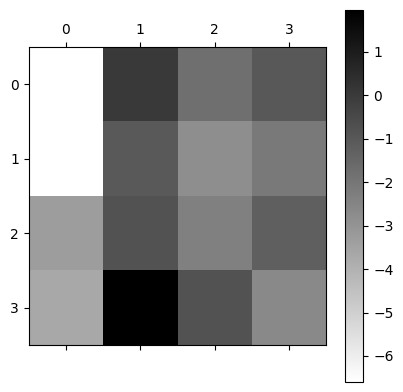

C:\Users\lamad\AppData\Local\Temp\ipykernel_24632\3569082329.py:2: RuntimeWarning: divide by zero encountered in log
  plt.matshow(np.log(w_HD/w_HD[0,1]), cmap='gray_r')


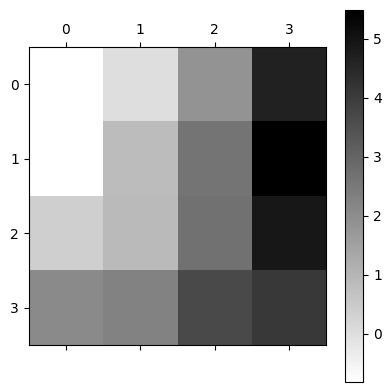

In [170]:
w_HD = w_LD / q[np.newaxis, :]
plt.matshow(np.log(w_HD/w_HD[0,1]), cmap='gray_r')
plt.colorbar(); plt.show()

C:\Users\lamad\AppData\Local\Temp\ipykernel_24632\1687838368.py:2: RuntimeWarning: divide by zero encountered in log
  plt.matshow(np.log(w_HD_mossing/w_HD_mossing[0,1]), cmap='gray_r')


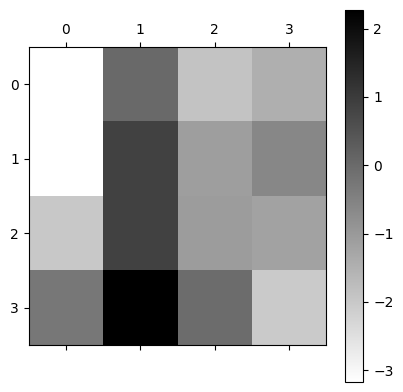

In [171]:
w_HD_mossing = w_LD / q_mossing[np.newaxis, :]
plt.matshow(np.log(w_HD_mossing/w_HD_mossing[0,1]), cmap='gray_r')
plt.colorbar(); plt.show()

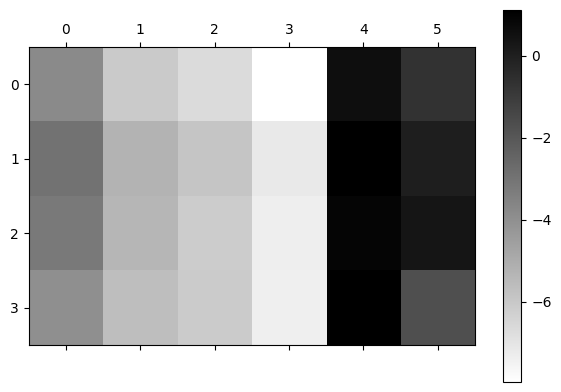

In [135]:
w = w_list[sorted_indices[:top_n]].mean(axis=0)[:]
plt.matshow(np.log(w), cmap='gray_r')
plt.colorbar(); plt.show()

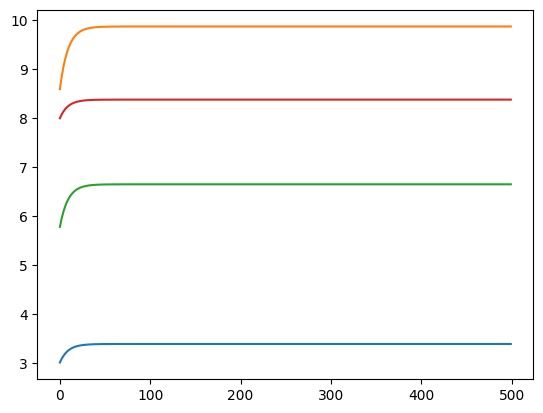

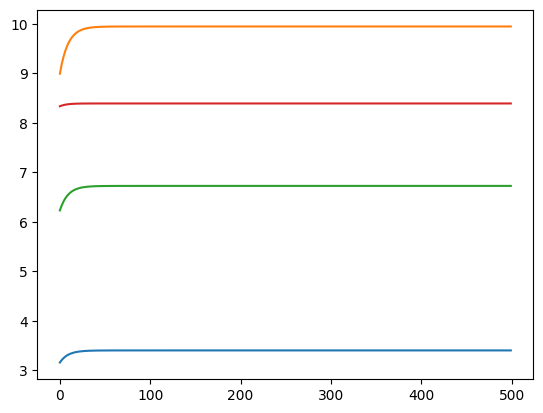

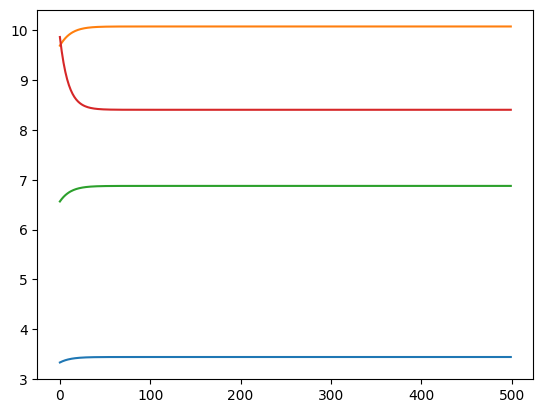

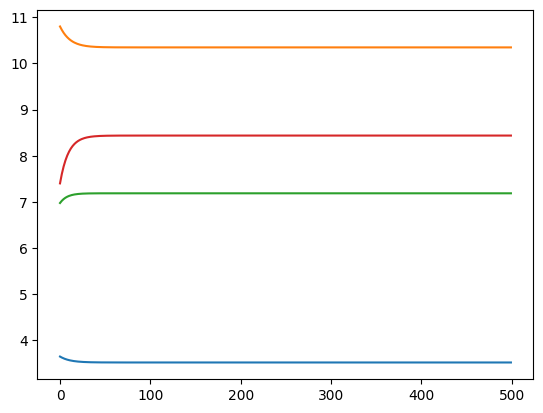

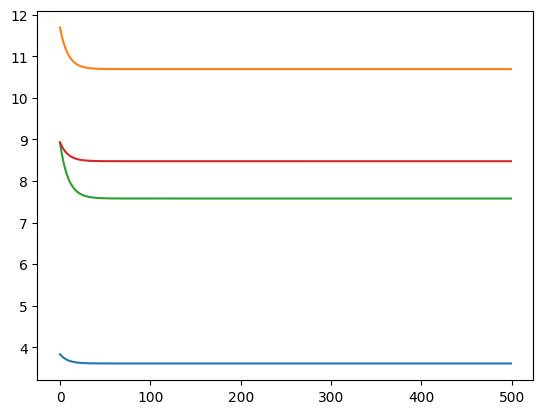

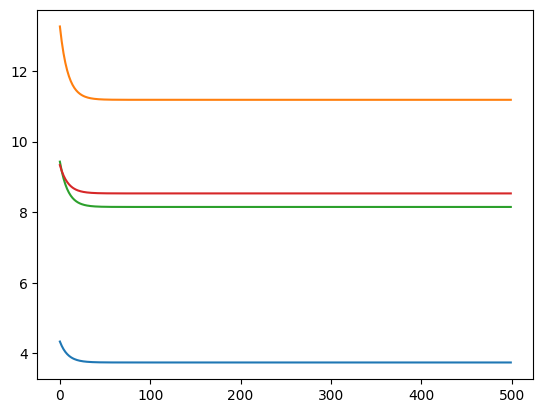

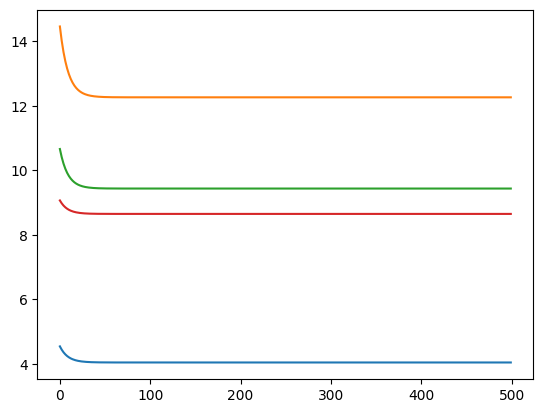

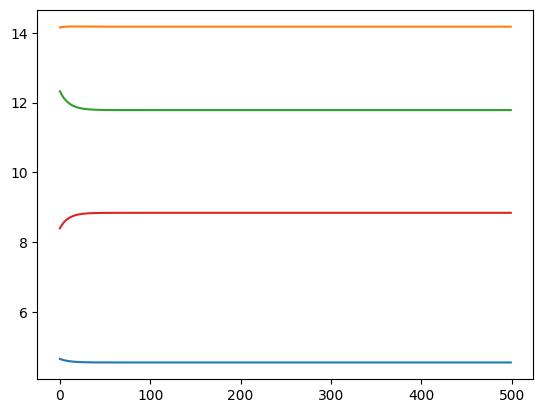

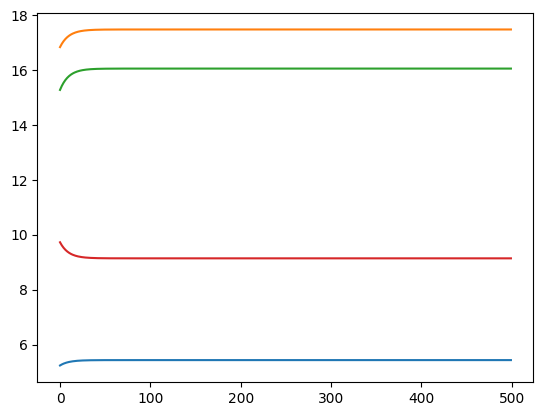

In [69]:
conv_r = [] 
w = w_list[sorted_indices[:top_n]].mean(axis=0)
for c_idx in range(9) : 
    conv_r.append( get_stable_solutions(c_idx,w,visualize=True) )
conv_r = np.asarray(conv_r)